# Bead Normalization through PalmettoBUG

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.objects as so

import palmettobug as pbug
from palmettobug._vendor.fcsy import DataFrame
import palmettobug._vendor.fcsparser as fcsparser

### CHANGE The following directory to match an existing directory on your computer if you are testing this tutorial on your own machine!

This notebook uses example data from the nolanlab: https://github.com/nolanlab/bead-normalization/blob/master/sample_data/ (from a GPL-3 licensed repo, on which are based Premessa's (and through that PalmettoBUG's) implementation of bead normalization of CyTOF data)

Specifically: 20120222_cells_found.fcs and its corresponding 20120222_cells_found_beads.fcs file
Note that for convenience I did not gate out dead cells / beads from the main 20120222_cells_found.fcs file, I just left it whole and normalized every event in the file.

In [2]:
my_computer_path =  "C:/Users/Default/Desktop" 
my_normlization_folder = f"{my_computer_path}/normalization_test"

Test of bead normamlization

NOTE!! -- This example notebook does not operate on any bundled example data. Instead, you must place you're own FCS files in each of these folders:

    1). Gate your raw FCS from the Helios into beads-only fraction, and the non-beads fraction. It is also best to have done the gating on live-dead
    
    2). Place the beads and non-beads files in the appropriate folders
    
    3). In the following cell, select the correct bead and channel names (these can vary based on your files -- choose the names you see in the example dataframe / FCS file)

In [3]:
bead_fcs_folder = f"{my_normlization_folder}/beads"   ## place all beads-only files in this folder
to_normalize_fcs_folder = f"{my_normlization_folder}/no_beads"       ## place the .fcs files that you want to normalize 
                                                                     ## (normally .fcs fields gated in another software to exclude beads & dead cells, 
                                                                     ## but in this case I don't bother)
output_folder = f"{my_normlization_folder}/normalization"

## Available Bead Channels
example_df = DataFrame.from_fcs(str(bead_fcs_folder) + "/" + os.listdir(bead_fcs_folder)[0])
example_df.columns

Index(['Time', 'EventNum', 'Bead1(La139)Di', 'Bead2(Pr141)Di',
       'CD11c(Tb159)Di', 'Bead3(Tm169)Di', 'Bead4(Lu175)Di'],
      dtype='object')

Manually change the beads / non-beads channels below to match the columns in your data (as displayed from the cell above)

In [4]:
## Available Channels to normalize
_, example_df = fcsparser.parse(str(to_normalize_fcs_folder) + "/" + os.listdir(to_normalize_fcs_folder)[0], channel_naming = "$PnS")
example_df.columns

Index(['Time', 'Cell_length', 'Bead1', 'Bead2', 'CD19', 'CD4', 'CD8', 'CD20',
       'CD61', 'CD123', 'CD45RA', 'CD45', 'CD33', 'CD11c', 'CD14', 'CD16',
       'CD38', 'Bead3', 'CD3', 'HLA-DR', 'Bead4', '(Ir191)Di', '(Ir193)Di',
       'eventnum'],
      dtype='object')

In [5]:
bead_channels = ['Bead1(La139)Di', 'Bead2(Pr141)Di', 'Bead3(Tm169)Di', 'Bead4(Lu175)Di'] 
channels_to_normalize = ['Bead1', 'Bead2', 'CD19', 'CD4', 'CD8', 'CD20',
                       'CD61', 'CD123', 'CD45RA', 'CD45', 'CD33', 'CD11c', 'CD14', 'CD16',
                       'CD38', 'Bead3', 'CD3', 'HLA-DR', 'Bead4', '(Ir191)Di', '(Ir193)Di']
pbug.CyTOF_bead_normalize(bead_fcs_folder, to_normalize_fcs_folder, output_folder, bead_channels, channels_to_normalize = channels_to_normalize, include_figures = True)

In [6]:
display("New output sub-folders in normalization:", os.listdir(f"{my_normlization_folder}/normalization"))

print("\nThe normalized sub-folder contains your non-bead (cell) events after normalization, while the normalized_beads contains the beads after normalization")

'New output sub-folders in normalization:'

['normalization_figures', 'normalized', 'normalized_beads']


The normalized sub-folder contains your non-bead (cell) events after normalization, while the normalized_beads contains the beads after normalization


In [7]:
display("Plots of normalization:", os.listdir(f"{my_normlization_folder}/normalization/normalization_figures"))

print("\nThese plots show the beads and non-beads (cells) expression over time in the experiment, both before and after normalization" 
      "\n For beads only the beads channels are used, while for the cells all channels provided in 'channels_to_normalize' are used.")

'Plots of normalization:'

['normalized_20120222_cells_found.png',
 'normalized_beads_20120222_cells_found_beads.png',
 'pre_beads_20120222_cells_found_beads.png',
 'pre_norm_20120222_cells_found.png']


These plots show the beads and non-beads (cells) expression over time in the experiment, both before and after normalization
 For beads only the beads channels are used, while for the cells all channels provided in 'channels_to_normalize' are used.


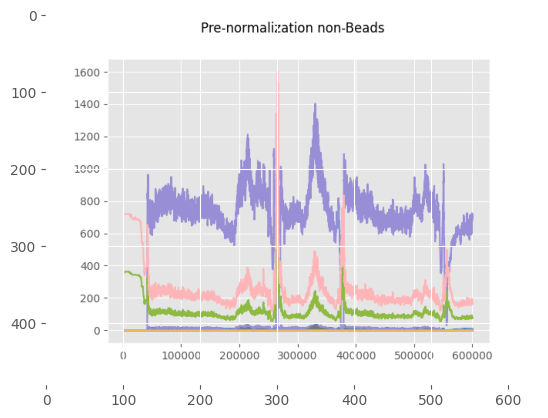

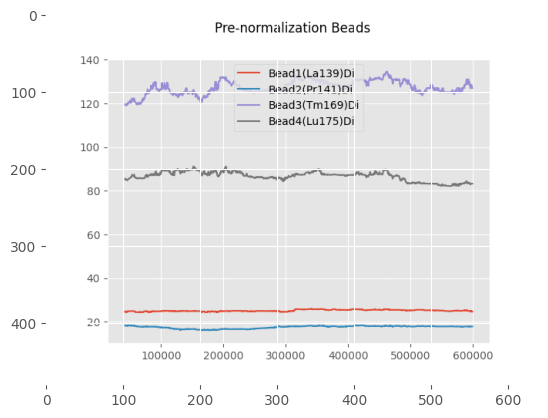

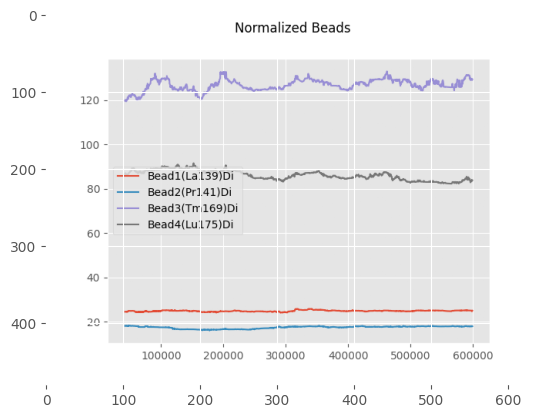

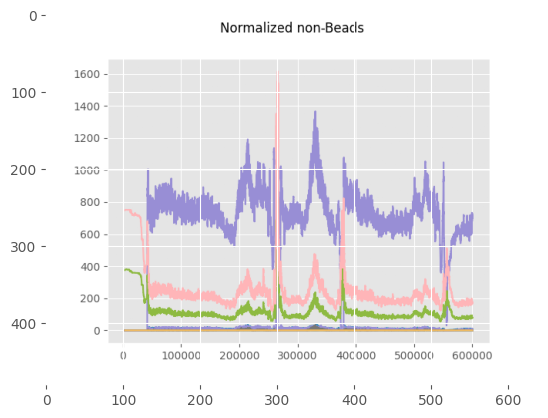

In [8]:
for i in reversed(os.listdir(f"{my_normlization_folder}/normalization/normalization_figures")):
    array = plt.imread(f"{my_normlization_folder}/normalization/normalization_figures/{i}")
    plt.imshow(array)
    plt.show()